<a href="https://colab.research.google.com/github/vivek9935/Machine_Learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error and r2_score

In [3]:
df = pd.read_csv("/content/gld_price_data.csv")

In [4]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df = df.drop(columns=['Date'])

In [8]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


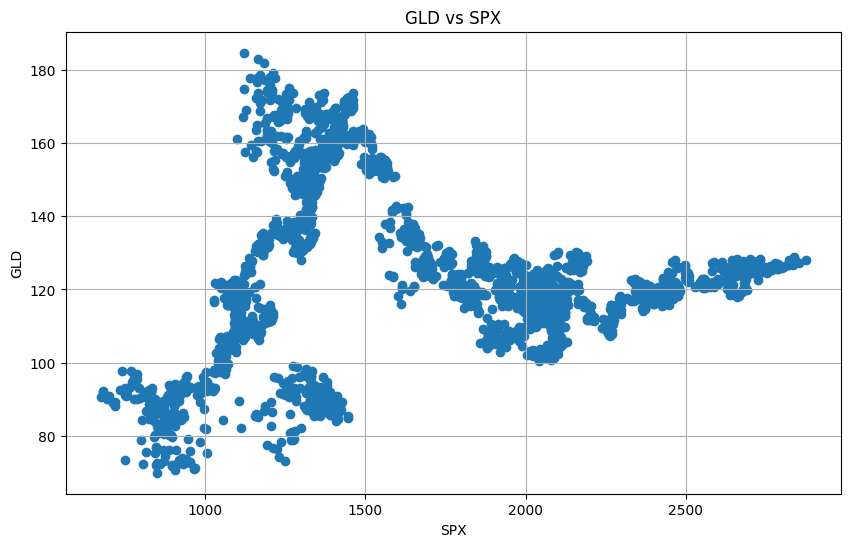

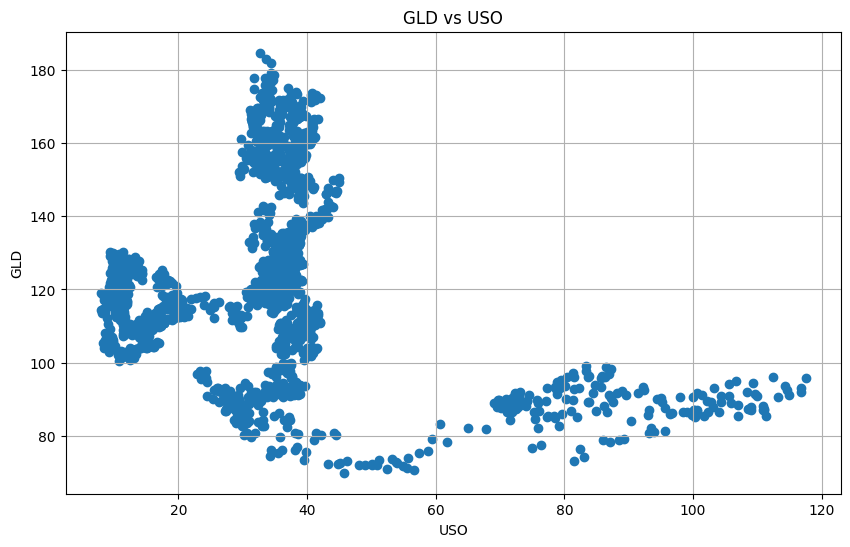

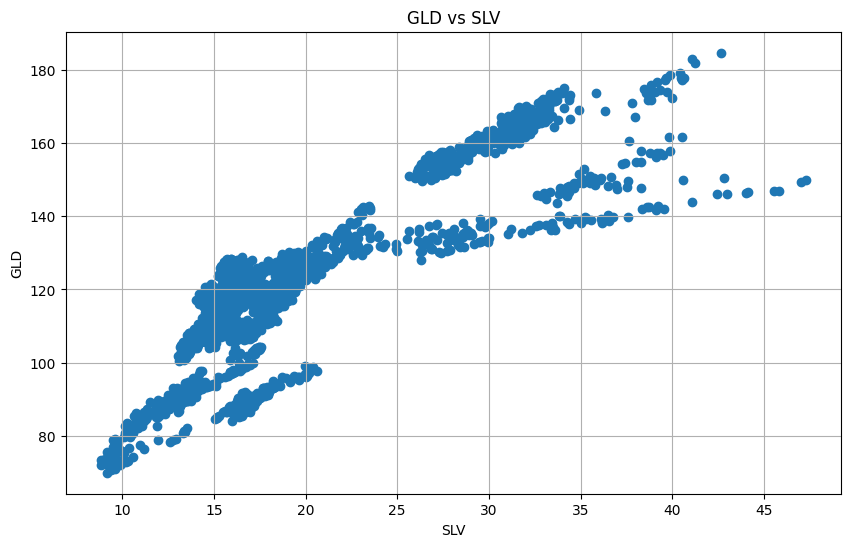

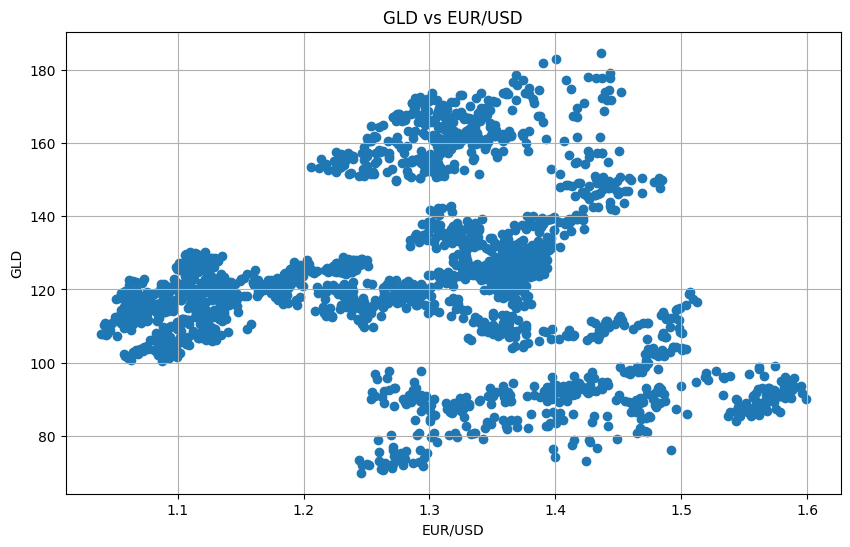

In [10]:
for col in df.columns:
  if col != 'GLD':
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col], df['GLD'])
    plt.xlabel(col)
    plt.ylabel('GLD')
    plt.title(f'GLD vs {col}')
    plt.grid(True)
    plt.show()
    print()


array([[<Axes: title={'center': 'SPX'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'USO'}>, <Axes: title={'center': 'SLV'}>],
       [<Axes: title={'center': 'EUR/USD'}>, <Axes: >]], dtype=object)

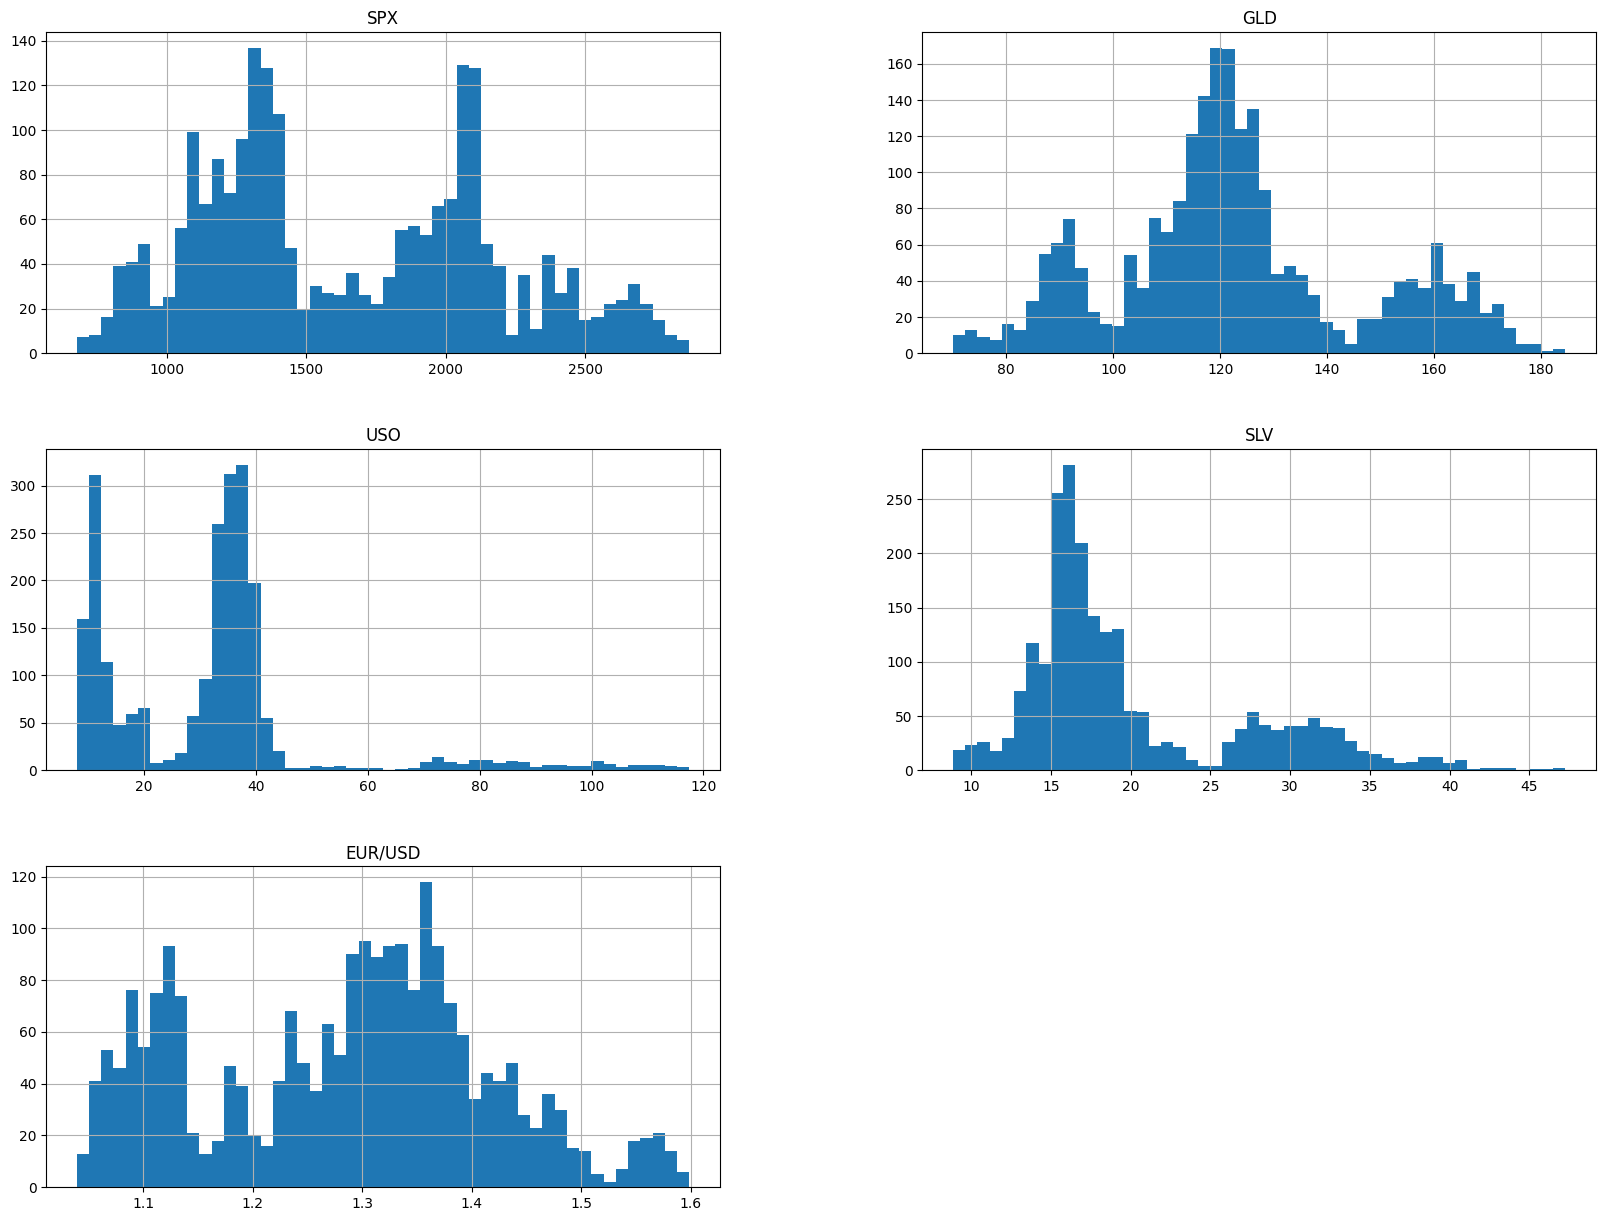

In [11]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))

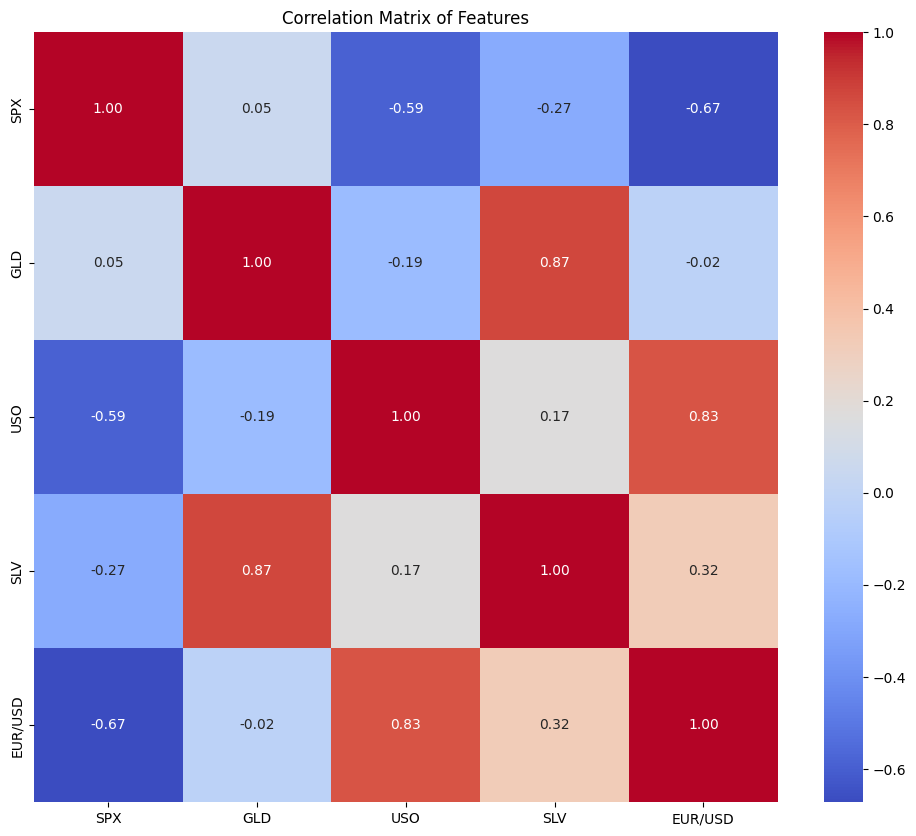

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [17]:
correlation = df.corr() # Calculate and store the correlation matrix in the 'correlation' variable
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [18]:
x = df.drop(columns=['GLD'], axis=1)
y = df['GLD']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
ml = RandomForestRegressor(n_estimators=100) # Create a RandomForestRegressor instance

In [25]:
ml.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
y_pred = ml.predict(x_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 6.044346573607803
Root Mean Squared Error (RMSE): 2.458525284313302
R-squared (R2): 0.9885402956598807


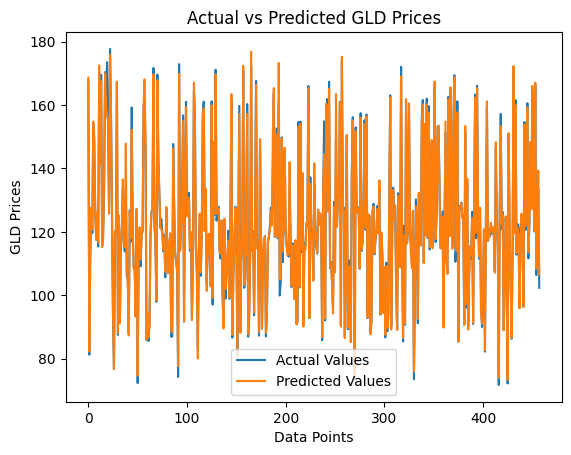

In [40]:
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('GLD Prices')
plt.title('Actual vs Predicted GLD Prices')
plt.legend()
plt.show()

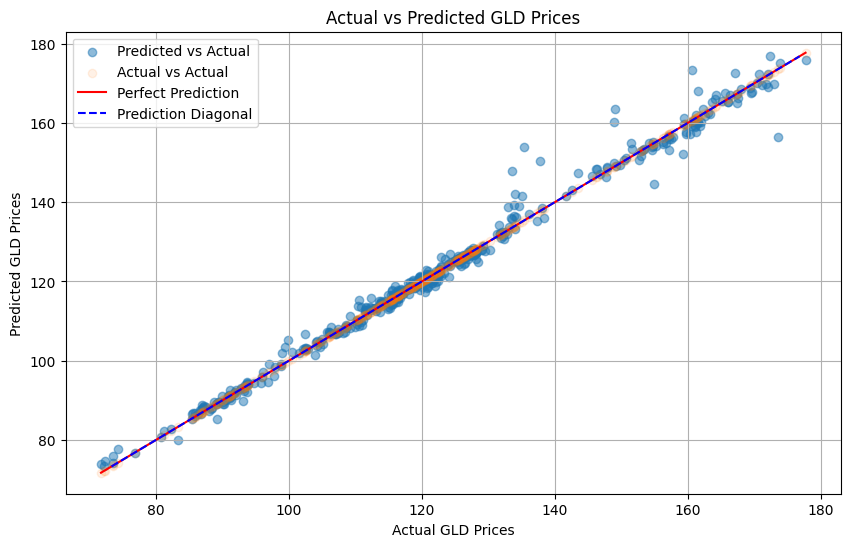

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual') # Scatter plot for predicted vs actual
plt.scatter(y_test, y_test, alpha=0.1, label='Actual vs Actual') # Scatter plot for actual vs actual
plt.xlabel('Actual GLD Prices')
plt.ylabel('Predicted GLD Prices')
plt.title('Actual vs Predicted GLD Prices')

# Diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Perfect Prediction')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='b', linestyle='--', label='Prediction Diagonal')
plt.grid(True)
plt.legend() # Show the legend
plt.show()
